In [ ]:
#Loan Approval Analysis Using Various factors perform EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel('D:\Loan_Approval_Prediction\copy of loan.xlsx')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [50]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

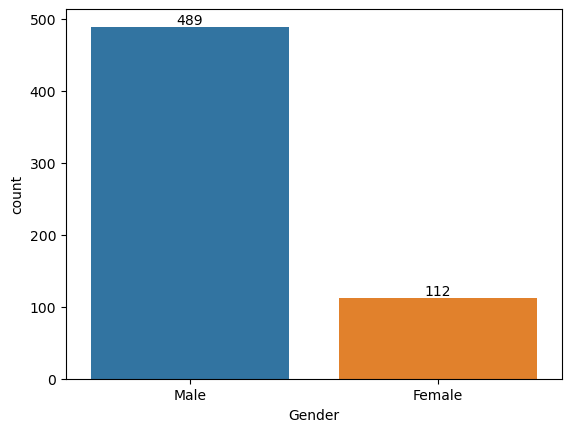

In [12]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
#Gender vs Married

<Axes: xlabel='Married', ylabel='count'>

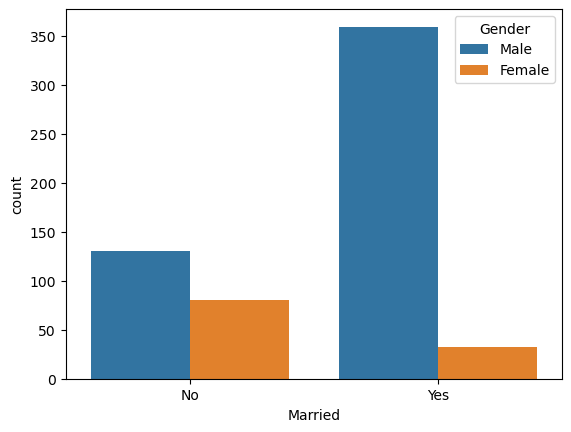

In [14]:
df['Married'].value_counts()
sns.countplot(x='Married',data=df,hue='Gender')

In [15]:
#Loan_ID VS Loan_Amount

<Axes: xlabel='Loan_ID', ylabel='LoanAmount'>

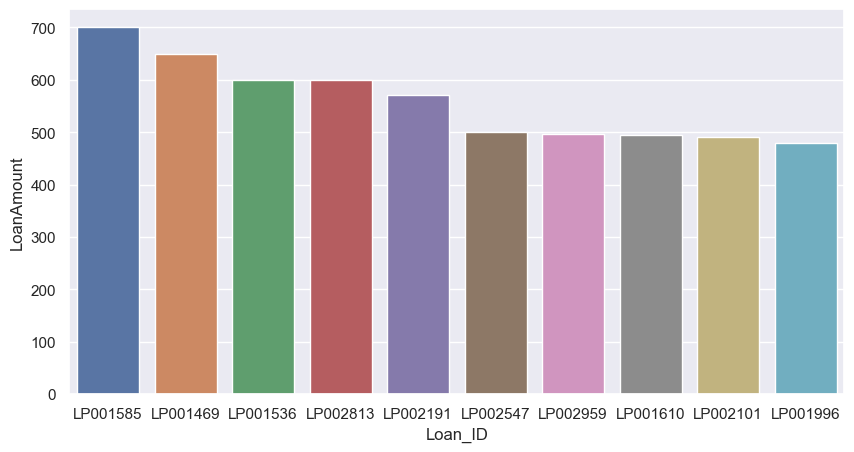

In [16]:
loan_amount_taken=df.groupby(['Loan_ID'],as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Loan_ID',y='LoanAmount',data=loan_amount_taken)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
loan_status=df.groupby(df['Loan_ID'],as_index=False)['Loan_Status'].agg(lambda x: x.mode()[0]).reset_index()
loan_status

,index,Loan_ID,Loan_Status
0,0,LP001002,Y
1,1,LP001003,N
2,2,LP001005,Y
3,3,LP001006,Y
4,4,LP001008,Y
...,...,...,...
609,609,LP002978,Y
610,610,LP002979,Y
611,611,LP002983,Y
612,612,LP002984,Y


In [19]:
# education vs LoanAmount

<Axes: xlabel='Education', ylabel='LoanAmount'>

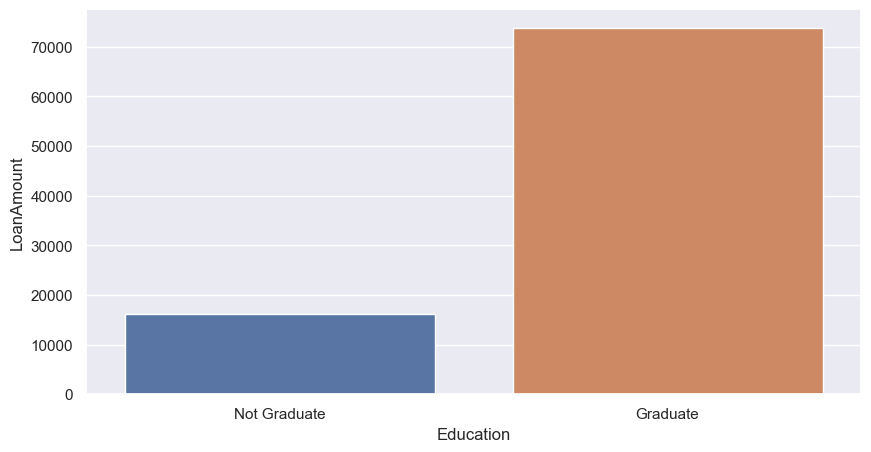

In [20]:
education=df.groupby(df['Education'],as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount').head(10)
sns.barplot(x='Education',y='LoanAmount',data=education)

In [21]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [22]:
# Loan_Amount_Term vs Loan_ID

<Axes: xlabel='Loan_ID', ylabel='Loan_Amount_Term'>

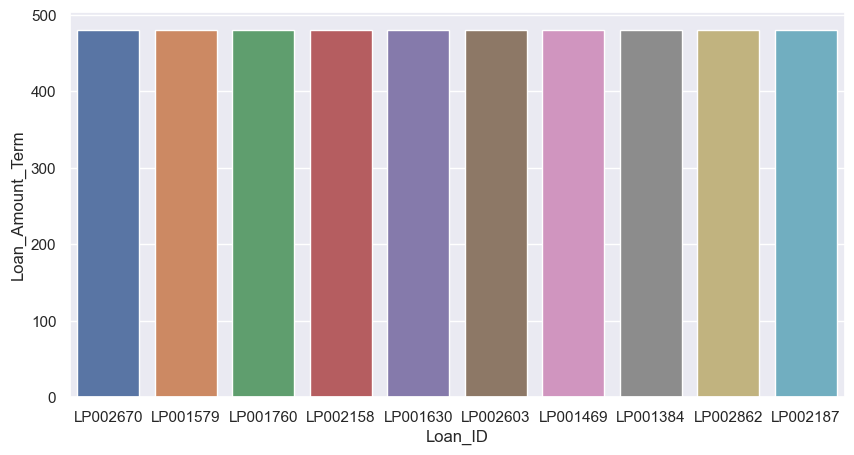

In [23]:
term=df.groupby(df['Loan_ID'],as_index=False)['Loan_Amount_Term'].sum().sort_values(by='Loan_Amount_Term',ascending=False).head(10)
sns.barplot(x='Loan_ID',y='Loan_Amount_Term',data=term)

In [24]:
#Loan_ID vs Dependents

In [25]:
depn=df.groupby(df['Loan_ID'],as_index=False)['Dependents'].agg(lambda x: x.mode()[0]).reset_index()
depn

,index,Loan_ID,Dependents
0,0,LP001002,0
1,1,LP001003,1
2,2,LP001005,0
3,3,LP001006,0
4,4,LP001008,0
...,...,...,...
609,609,LP002978,0
610,610,LP002979,3+
611,611,LP002983,1
612,612,LP002984,2


In [26]:
#Self_Employed vs LoanAmount

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

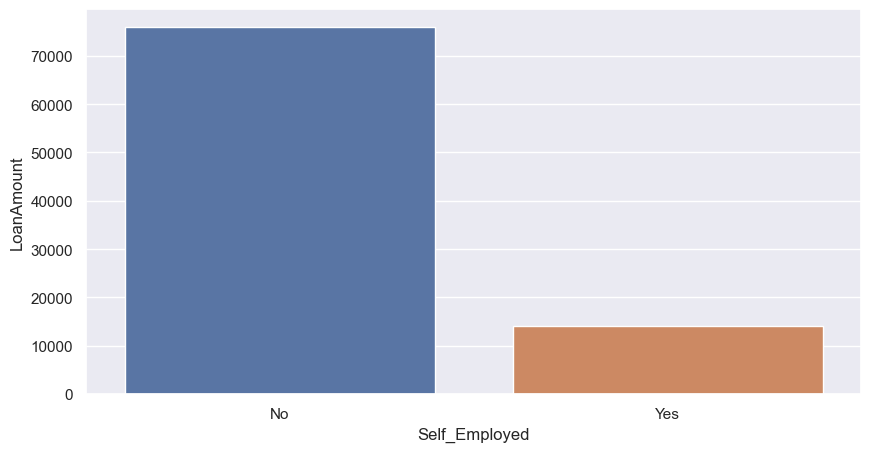

In [27]:
emp=df.groupby(df['Self_Employed'],as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount',ascending=False)

sns.barplot(x='Self_Employed',y='LoanAmount',data=emp)

<Axes: >

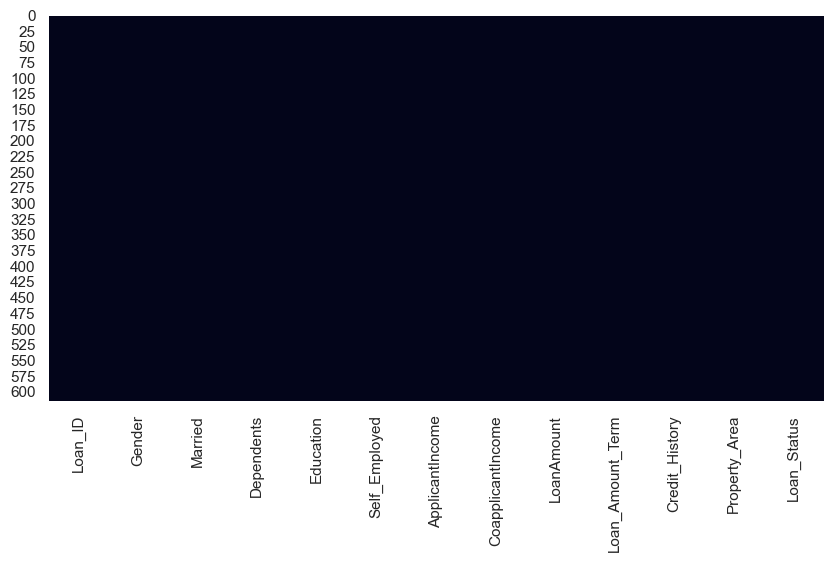

In [52]:
sns.heatmap(df.isnull(),cbar=False)

In [51]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [42]:
x=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
y=df['Loan_Status']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
label_encoder_Status = LabelEncoder()
encoded_labels = label_encoder_Status.fit_transform(df['Loan_Status'])

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf=RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred1=clf.predict(x_test)
y_pred1

array(['N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [58]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7886178861788617

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
y_pred_dt=dt_clf.predict(x_test)
y_pred_dt

array(['N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [62]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.6910569105691057

In [44]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=model.predict(x_test)

In [46]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8373983739837398


In [ ]:
#Conclusion:-

Loan Prediction Analysis allows you to apply for loans and receive notifications when they are approved. 
By the data provided by the applicant, 
the system notifies the applicant of the loan's availability.